In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Bibliotecas

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV

import warnings; warnings.simplefilter('ignore')

# DataFrame Prepared

### Importando Dataframe e separando em train / predict

In [3]:
df_uni =pd.read_csv('/content/drive/MyDrive/TCC/df_final.csv')

In [4]:
df_uni.head()

,Unnamed: 0,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID,Demanda_uni_equil,id,test,mediaClientProd,quantClientProd,mediaProd,quantProd,mediaClient,quantClient
0,0,9,2655,2,4189,26,30235,4.574711,0,0,0.0,0.0,32.435081,1602.0,27.091603,131.0
1,1,9,2061,2,7212,26,31393,2.639057,0,0,17.5,4.0,11.782707,13300.0,27.091603,131.0
2,2,10,2655,2,4189,26,31518,0.000000,1569352,1,0.0,0.0,13.333333,129.0,27.091603,131.0
3,3,11,2655,2,4189,26,31520,0.000000,4728674,1,0.0,0.0,27.497359,1136.0,27.091603,131.0
4,4,9,2061,2,7212,26,32962,2.397895,0,0,0.0,0.0,20.038141,5873.0,27.091603,131.0


In [5]:
train = df_uni[df_uni['test']==0]
predict = df_uni[df_uni['test']==1]

### Preenchendo os Nan valeus (valores faltantes) pela média dos valores da coluna.

In [6]:
train['mediaClientProd'].fillna(train['mediaClientProd'].mean(), inplace=True)
train['quantClientProd'].fillna(train['quantClientProd'].mean(), inplace=True)
train['mediaProd'].fillna(train['mediaProd'].mean(), inplace=True)
train['quantProd'].fillna(train['quantProd'].mean(), inplace=True)
train['mediaClient'].fillna(train['mediaClient'].mean(), inplace=True)
train['quantClient'].fillna(train['quantClient'].mean(), inplace=True)

### Train test split

In [7]:
y = train['Demanda_uni_equil']
X = train[[ 'Agencia_ID','Canal_ID','Cliente_ID','Producto_ID','Ruta_SAK','mediaClientProd','quantClientProd', 'mediaProd', 'quantProd', 'mediaClient','quantClient']]

In [ ]:
print(X.shape, y.shape)

(10408713, 11) (10408713,)


In [8]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape , y_test.shape)

(8326970, 11) (2081743, 11) (8326970,) (2081743,)


In [9]:
dados = X_train['mediaClientProd'].fillna(X_train['mediaClientProd'].mean())

In [10]:
df_train_split = X_train.sample(frac=0.1, random_state=200)
print(df_train_split.shape)

df_train_y_split = y_train.sample(frac=0.1, random_state=200)
print(df_train_y_split.shape)

(832697, 11)
(832697,)


# Random forest



##Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    
    'max_depth': [2, 6, 12],    
    'n_estimators': [200, 300, 500, 800, 1200]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)

grid_search.fit(df_train_split, df_train_y_split)

print(grid_search.best_params_)

##Modelo

In [11]:
RF_regression = RandomForestRegressor(bootstrap= True, max_depth= 12, n_estimators= 50)

In [12]:
RF_regression.fit(X_train,y_train)

RandomForestRegressor(max_depth=12, n_estimators=50)

Feature Importance

Text(0.5, 1.0, 'Importância de cada feature')

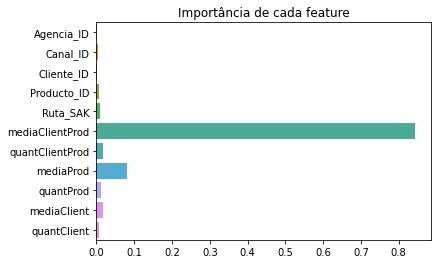

In [14]:
importances = pd.Series(data=RF_regression.feature_importances_, index=RF_regression.feature_names_in_)
sns.barplot(x=importances, y=importances.index, orient='h').set_title('Importância de cada feature')

Predição


In [15]:
y_pred_rf = RF_regression.predict(X_test)

In [16]:
y_pred_rf

array([1.60894229, 0.92280592, 2.45317296, ..., 3.0711189 , 2.00659525,
       1.04747094])

## Métricas de Avaliação


Root Mean Squared Logaritmic Error (RMSLE) Random Forest

In [17]:
rmsle_rf = np.sqrt(mean_squared_log_error(y_test, y_pred_rf))

In [18]:
rmsle_rf

0.19970913279850483

Root Mean Squared Error (RMSE) Random Forest

In [19]:
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
rmse_rf

0.46877000659533535

 Mean Absolute Error (MAE) Random Forest

In [20]:
mae_rf = np.sqrt(mean_absolute_error(y_test, y_pred_rf))
mae_rf

0.5921670053498294

# XGboost

## Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [2, 6, 12],
    
    
    'n_estimators': [200, 300, 500, 800, 1200]
}
# Create a based model
xgbr = xgb.XGBRegressor(objective ='reg:linear')
# Instantiate the grid search model



In [ ]:
grid_search = GridSearchCV(estimator = xgbr, param_grid = param_grid,  cv = 3, n_jobs = -1, verbose = 2)

grid_search.fit(df_train_split, df_train_y_split)

print(grid_search.best_params_)


## Modelo

In [21]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear',max_depth = 12, alpha = 10, n_estimators = 2 , subsample=0.85 )

In [ ]:
xg_reg.fit(X_train,y_train)

[14:33:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:33:55] WARNING: /workspace/src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.


XGBRegressor(alpha=10, max_depth=12, n_estimators=2, subsample=0.85)

Text(0.5, 1.0, 'Importância de cada feature')

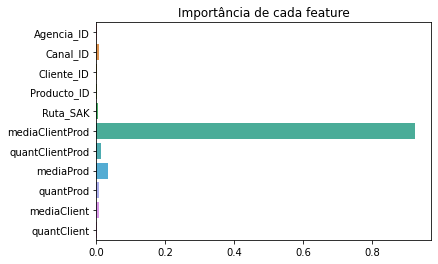

In [ ]:
importances = pd.Series(data=xg_reg.feature_importances_, index=xg_reg.get_booster().feature_names)
sns.barplot(x=importances, y=importances.index, orient='h').set_title('Importância de cada feature')


In [ ]:
y_pred_xgb = xg_reg.predict(X_test)

In [ ]:
y_pred_xgb

array([0.70969045, 0.5821644 , 0.8763822 , ..., 0.9738221 , 0.78344727,
       0.6078771 ], dtype=float32)

## Root Mean Squared Logaritmic Error (RMSLE) XGBoost

In [ ]:
rmsle_xgb = np.sqrt(mean_squared_log_error(y_test, y_pred_xgb))

In [ ]:
rmsle_xgb

0.454640380051184

## Root Mean Squared  Error (RMSE) XGBoost

In [ ]:
rmse_xgb  = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
rmse_xgb

1.1522085749675626

## Mean Absolute Error (MAE) XGBoost

In [ ]:
mae_xgb  = np.sqrt(mean_absolute_error(y_test, y_pred_xgb))
mae_xgb

0.95592169041677

# Submission

In [ ]:
predict.drop('Unnamed: 0', axis=1 ,inplace=True)

In [ ]:
predict.head()

In [ ]:
predict[predict['Semana']==10]

In [ ]:
X_semana_10 =  predict[predict['Semana']==10][['Agencia_ID','Canal_ID','Cliente_ID','Producto_ID','Ruta_SAK','mediaClientProd','quantClientProd', 'mediaProd', 'quantProd', 'mediaClient','quantClient']]
X_semana_11 =  predict[predict['Semana']==11][['Agencia_ID','Canal_ID','Cliente_ID','Producto_ID','Ruta_SAK','mediaClientProd','quantClientProd', 'mediaProd', 'quantProd', 'mediaClient','quantClient']]

In [ ]:
X_semana_10.head()

## Random Forest

In [ ]:
y_semana_10_RF = RF_regression.predict(X_semana_10)
y_semana_11_RF = RF_regression.predict(X_semana_11)

In [ ]:
# Inverse np.log1p
submission_10_RF = pd.DataFrame({'id':predict[predict['Semana']==10]['id'], 'Demanda_uni_equil': np.expm1(y_semana_10_RF)})
submission_11_RF = pd.DataFrame({'id':predict[predict['Semana']==11]['id'], 'Demanda_uni_equil':np.expm1(y_semana_11_RF)}) 

In [ ]:
submit_RF = pd.concat([submission_10_RF[['id','Demanda_uni_equil']],submission_11_RF[['id','Demanda_uni_equil']]], axis=0, copy=True)

In [ ]:
submit_RF

In [ ]:
submit_RF.to_csv('/content/drive/MyDrive/TCC/prediction_RF.csv', index=False)

## XGboost Regressor

In [ ]:
y_semana_10_xgb = xg_reg.predict(X_semana_10)
y_semana_11_xgb = xg_reg.predict(X_semana_11)

In [ ]:
# Inverse np.log1p
submission_10_xgb = pd.DataFrame({'id':predict[predict['Semana']==10]['id'], 'Demanda_uni_equil': np.expm1(y_semana_10_xgb)})
submission_11_xgb = pd.DataFrame({'id':predict[predict['Semana']==11]['id'], 'Demanda_uni_equil':np.expm1(y_semana_11_xgb)}) 

In [ ]:
submit_xgb = pd.concat([submission_10_xgb[['id','Demanda_uni_equil']],submission_11_xgb[['id','Demanda_uni_equil']]], axis=0, copy=True)

In [ ]:
submit_xgb

In [ ]:
submit_xgb.to_csv('/content/drive/MyDrive/TCC/prediction_xgb.csv', index=False)